<a href="https://colab.research.google.com/github/S-Muaz/AIML-IIITH/blob/main/Task_a_%26_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [ ]:


from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/hateful_memes/hateful_memes'

In [3]:
os.chdir(path)

## ⬇ **Installing Dependencies**

In [4]:
!pip install ultralytics==8.0.231
!pip install keras_ocr==0.9.3
!pip install scikit-learn==1.4.0
!pip install seaborn==0.12.2
!pip install nltk==3.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## **Importing Required Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import keras_ocr
import ultralytics
import cv2
import random
import json

## **Task A :  Object Detection**
*Overview of YOLOv8 :*<br>

1.   It is the latest iteration in the YOLO series of real-time object detectors, offering cutting-edge performance in terms of accuracy and speed.

2.  Building upon the advancements of previous YOLO versions, YOLOv8 introduces new features and optimizations that make it an ideal choice for various object detection tasks in a wide range of applications.




In [6]:
model = ultralytics.YOLO("yolov8x.pt")
results = model.predict(path + '/img/01348.png') # making prediction on single image for sample prediction


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/hateful_memes/hateful_memes/img/01348.png: 640x576 6 persons, 8 sheeps, 86.6ms
Speed: 12.8ms preprocess, 86.6ms inference, 1196.6ms postprocess per image at shape (1, 3, 640, 576)


In [7]:
objects = results[0].names
type(objects)

dict

In [8]:
objects[len(objects)] = 'others' # adding another class, in case the class does not exist in the pre-defined class set
detected_objects_freq = {object:0 for object in objects.values()} # initializing the frequency of objects to 0

In [9]:
memes = os.listdir(path + '/img') #meme images directory

In [29]:
image_indexes = np.arange(len(memes))
random.shuffle(image_indexes) # shuffling the dataset to make the sample diverse
shuffled_images = [memes[index] for index in image_indexes]
print(shuffled_images)

['23419.png', '35729.png', '81947.png', '08654.png', '48175.png', '16820.png', '54069.png', '19526.png', '95086.png', '52796.png', '12694.png', '39758.png', '79321.png', '81395.png', '80614.png', '04975.png', '06825.png', '57089.png', '39287.png', '86920.png', '51687.png', '62573.png', '98341.png', '17238.png', '81320.png', '89436.png', '45612.png', '69032.png', '57298.png', '25610.png', '59076.png', '69025.png', '73162.png', '51498.png', '64312.png', '78613.png', '02413.png', '97132.png', '31058.png', '06952.png', '02935.png', '79568.png', '58276.png', '62351.png', '57864.png', '25067.png', '82137.png', '64193.png', '94026.png', '60421.png', '79346.png', '24698.png', '69128.png', '02561.png', '70465.png', '02654.png', '51608.png', '83619.png', '60197.png', '01875.png', '96405.png', '82396.png', '78903.png', '14796.png', '54170.png', '61549.png', '06375.png', '78964.png', '72345.png', '41270.png', '08563.png', '34910.png', '05264.png', '08514.png', '79340.png', '79461.png', '74132.png'

**Performing Object Detection :**

------
⚠ Do Not run the below 2 cells since already object detection is done

In [11]:
human_images, animals_images, others_images = [], [], []

total_count = 0
humans_count = 0
animals_count = 0
others_count = 0

In [ ]:
count = 0

for meme in shuffled_images:
    meme_ = cv2.imread(path + '/img/' + meme)
    resized_meme = cv2.resize(meme_, (416, 416)) # resizing memes to the dimensions required for yolo v8 model.
    results = model.predict(resized_meme)
    detected_objects_list = set()
    if len(results[0].boxes)>0:
        result = results[0]
        for box in result.boxes: # for loop iterating through the boxes in the dectection
            object_index = int(box.cls[0])
            object_class = objects[object_index]
            detected_objects_freq[object_class] += 1
            if object_class == 'person':
              detected_objects_list.add('person')
            elif object_index in range(14, 24):
              detected_objects_list.add('animal')
            else:
              detected_objects_list.add('others')

        if total_count < 6000:
          if humans_count < 3000:
              if 'person' in detected_objects_list:
                human_images.append(meme)
                humans_count += 1
                total_count += 1
              elif 'animal' in detected_objects_list and animals_count < 1500:
                animals_images.append(meme)
                animals_count += 1
                total_count += 1
              else:
                others_images.append(meme)
                others_count += 1
                total_count += 1
          elif animals_count < 1500:
            if 'animal' in detected_objects_list:
              animals_images.append(meme)
              animals_count += 1
              total_count += 1
            elif 'others' in detected_objects_list and others_count < 1500:
              others_images.append(meme)
              others_count += 1
              total_count += 1
          else:
            if 'others' in detected_objects_list:
              others_images.append(meme)
              total_count += 1

    else:
        detected_objects_freq['others'] += 1

    count += 1
    if count%100 == 0:
      print()
      print("="*100)
      print(f'{count} images detection completed')
      print("="*100)

print("Object detection for all of the images finished !!")

Streaming output truncated to the last 5000 lines.
0: 640x640 1 person, 58.9ms
Speed: 3.0ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 1 tie, 57.2ms
Speed: 2.9ms preprocess, 57.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 1 tie, 1 book, 56.5ms
Speed: 3.2ms preprocess, 56.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 donut, 57.3ms
Speed: 3.0ms preprocess, 57.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

10500 images detection completed

0: 640x640 1 dog, 59.9ms
Speed: 3.1ms preprocess, 59.9ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 55.7ms
Speed: 3.1ms preprocess, 55.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 1 parking meter, 56.8ms
Speed: 4.9ms preprocess, 56.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 6

In [12]:
print(len(detected_objects_freq))
print(detected_objects_freq)

81
{'person': 0, 'bicycle': 0, 'car': 0, 'motorcycle': 0, 'airplane': 0, 'bus': 0, 'train': 0, 'truck': 0, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'couch': 0, 'potted plant': 0, 'bed': 0, 'dining table': 0, 'toilet': 0, 'tv': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'toaster': 0, 'sink': 0, 'refrigerator'

In [10]:
# Cataloging the types of objects detected

transport = ['bicycle',
             'car',
             'motorcycle',
             'airplane',
             'bus',
             'train',
             'boat',
             'truck']

street_objects = ['traffic light',
                  'fire hydrant',
                  'stop sign',
                  'parking meter',
                  'bench']

animals = ['bird',
           'cat',
           'dog',
           'horse',
           'sheep',
           'cow',
           'elephant',
           'bear',
           'zebra',
           'giraffe']

sporting_goods = ['frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket']

household_things = ['book',
                    'clock',
                    'vase',
                    'scissors',
                    'teddy bear',
                    'hair drier',
                    'toothbrush',
                    'chair',
                    'couch',
                    'potted plant',
                    'bed',
                    'dining table',
                    'toilet',
                    'sink',
                    'backpack',
                    'umbrella',
                    'handbag',
                    'tie',
                    'suitcase']

food = ['banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake']

electronics = ['tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'refrigerator']

crockery = ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl']

In [11]:
categories = ['crockery', 'electronics', 'food', 'household_things', 'animals', 'sporting_goods', 'street_objects', 'transport']
categories_and_freq = {}

index = 0
for category in [crockery, electronics, food, household_things, animals, sporting_goods, street_objects, transport]:
  total_frequency = 0
  for object in category:
    total_frequency += detected_objects_freq[object]
  categories_and_freq[categories[index]] = total_frequency
  index += 1

categories_and_freq['person'] = detected_objects_freq['person']
categories_and_freq['others'] = detected_objects_freq['others']

In [12]:
categories_and_freq

{'crockery': 0,
 'electronics': 0,
 'food': 0,
 'household_things': 0,
 'animals': 0,
 'sporting_goods': 0,
 'street_objects': 0,
 'transport': 0,
 'person': 0,
 'others': 0}

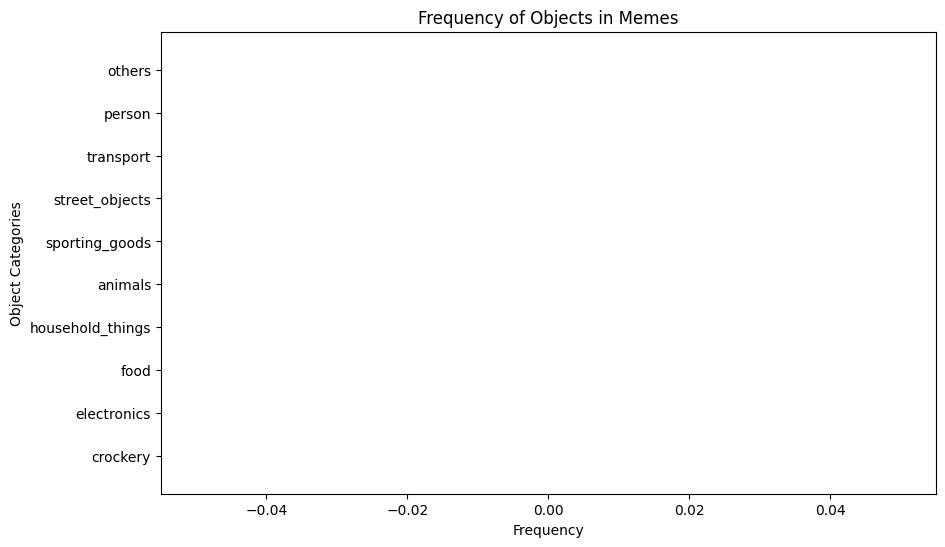

In [13]:
# Extracting category labels and frequencies
categories = list(categories_and_freq.keys())
frequencies = list(categories_and_freq.values())

# Creating a color gradient for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(categories, frequencies, color=colors)

# Adding labels and title
plt.xlabel("Frequency")
plt.ylabel("Object Categories")
plt.title("Frequency of Objects in Memes")

# Adding frequency values on the bars
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(freq),
             va='center', ha='left', fontsize=10, color='white')

# Displaying the plot
plt.show()


# **Task B : Caption Impact Assesment**

*Approach :*





*   We will remove the caption from the images using image processsing techniques.

*   Run the object detection algorithm again on both the images containing caption and without the caption.

*   Check if there are any changes in the objects detected in the images containing captions and without the captions.

*   Check the difference in confidence levels of the objects detected after processing.


This way we can assess the impact of captions in object detection.

In [17]:
def remove_caption(img):
  """
  Remove text from images

  """

  #General Approach.....
  #Use keras OCR to detect text, define a mask around the text, and inpaint the
  #masked regions to remove the text.
  #To apply the mask we need to provide the coordinates of the starting and
  #the ending points of the line, and the thickness of the line

  #The start point will be the mid-point between the top-left corner and
  #the bottom-left corner of the box.
  #the end point will be the mid-point between the top-right corner and the bottom-right corner.
  #The following function does exactly that.
  def midpoint(x1, y1, x2, y2):
      x_mid = int((x1 + x2)/2)
      y_mid = int((y1 + y2)/2)
      return (x_mid, y_mid)

  #Main function that detects text and inpaints.
  #Inputs are the image path and kreas_ocr pipeline
  def inpaint_text(img_path, pipeline):
      # read the image
      img = keras_ocr.tools.read(img_path)

      # Recogize text (and corresponding regions)
      # Each list of predictions in prediction_groups is a list of
      # (word, box) tuples.
      prediction_groups = pipeline.recognize([img])

      #Define the mask for inpainting
      mask = np.zeros(img.shape[:2], dtype="uint8")
      for box in prediction_groups[0]:
          x0, y0 = box[1][0]
          x1, y1 = box[1][1]
          x2, y2 = box[1][2]
          x3, y3 = box[1][3]

          x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
          x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

          #For the line thickness, we will calculate the length of the line between
          #the top-left corner and the bottom-left corner.
          thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

          #Define the line and inpaint
          cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,
          thickness)
          inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

      return(inpainted_img)

  # keras-ocr will automatically download pretrained
  # weights for the detector and recognizer.
  pipeline = keras_ocr.pipeline.Pipeline()

  img_text_removed = inpaint_text(img, pipeline)

  # plt.imshow(img_text_removed)

  # cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))
  img_text_removed = cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB)

  return img_text_removed

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 11s 11s/step


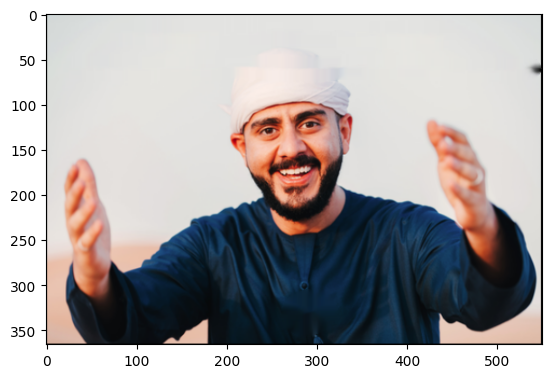

In [19]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
# example of a meme after the captions are removed


img = cv2.imread('/content/drive/MyDrive/hateful_memes/hateful_memes/img/01235.png')
plt.imshow(img)
caption_removed_image = remove_caption(img)
plt.imshow(caption_removed_image)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 19s 19s/step


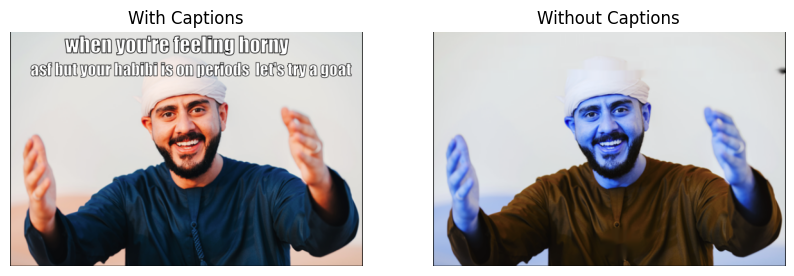

In [20]:
# Load the image with captions
img_with_caption = cv2.imread('/content/drive/MyDrive/hateful_memes/hateful_memes/img/01235.png')

# Remove the captions
caption_removed_image = remove_caption(img_with_caption)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the image with captions
axes[0].imshow(cv2.cvtColor(img_with_caption, cv2.COLOR_BGR2RGB))
axes[0].set_title('With Captions')

# Plot the image with captions removed
axes[1].imshow(cv2.cvtColor(caption_removed_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Without Captions')

# Hide the axes
for ax in axes:
    ax.axis('off')

# Show the plot
plt.show()


In [22]:
model = ultralytics.YOLO("yolov8x.pt")

## ⚠  **Do Not Run the cell below since object detection has already been done**


In [ ]:
num_of_extra_objects_detected = 0
num_of_imgs_extra_objects_detected = 0
num_of_imgs_less_objects_detected = 0
num_of_new_detections = 0
n_imgs_positive_conf = 0
n_imgs_negative_conf = 0
count = 0
positive_conf, negative_conf = 0, 0
for meme in shuffled_images[:500]:              # taking only first 500 images since data is huge
  meme_ = cv2.imread(path+'/img/'+meme)
  print(meme_.shape)
  original_image = cv2.resize(meme_, (416, 416)) # resizing memes to the dimensions required for yolo v8 model.
  caption_removed_image = remove_caption(original_image)

  # detecting objects in images before and after processing
  results_original = model.predict(original_image)
  results_processed = model.predict(caption_removed_image)

  if len(results_original[0].boxes) > 0:
    total_confidence_o = 0.0
    result = results_original[0]
    num_of_objects_detected_orig = len(result.boxes)
    for object in result.boxes:
      total_confidence_o += object.conf

  if len(results_processed[0].boxes) > 0:
    total_confidence_p = 0.0
    result = results_processed[0]
    num_of_objects_detected_proc = len(result.boxes)
    for object in result.boxes:
      total_confidence_p += object.conf

  if (len(results_processed[0].boxes)!=0 and len(results_original[0].boxes)==0):
    num_of_new_detections += 1

  if num_of_objects_detected_orig != num_of_objects_detected_proc:
    diff = num_of_objects_detected_proc - num_of_objects_detected_orig
    if diff>0:
      num_of_extra_objects_detected += diff
      num_of_imgs_extra_objects_detected += 1
    else:
      num_of_imgs_less_objects_detected += 1

  diff_conf = total_confidence_p - total_confidence_o
  if diff_conf > 0:
    n_imgs_positive_conf += 1
    positive_conf += diff_conf
  else:
    n_imgs_negative_conf += 1
    negative_conf += abs(diff_conf)

  total_confidence_o, total_confidence_p = 0, 0
  num_of_objects_detected_orig, num_of_objects_detected_proc = 0, 0

  count += 1
  if count%50 == 0:
    print()
    print("="*100)
    print(f'{count} images detection completed')
    print("="*100)

print("\nObject detection for all of the images finished !!")



In [39]:

# Caption Impact Analysis Report
print("="*120)
print("Caption Impact Analysis Report")
print("="*120)
print(f"Number of processed images in which greater number of objects were found compared to original images = {num_of_imgs_extra_objects_detected}")
print(f"Total number of extra objects detected after processing = {num_of_extra_objects_detected}")
print(f"Number of processed images in which less number of objects were found compared to original images = {num_of_imgs_less_objects_detected}")
print(f"Number of processed images in which object detections were present whereas in the original images it was absent = {num_of_new_detections}")
print(f"Number of images in which the confidence of detections increased after processing = {n_imgs_positive_conf}")
print(f"Number of images in which the confidence of detections decreased after processing = {n_imgs_negative_conf}")
print(f"Average positive confidence increase = {(int(positive_conf[0])/n_imgs_positive_conf)*100}")
print(f"Average negative confidence increase = {(int(negative_conf[0])/n_imgs_negative_conf)*100}")
print()
print("="*120)
print("="*120)

Caption Impact Analysis Report
Number of processed images in which greater number of objects were found compared to original images = 87
Total number of extra objects detected after processing = 117
Number of processed images in which less number of objects were found compared to original images = 114
Number of processed images in which object detections were present whereas in the original images it was absent = 4
Number of images in which the confidence of detections increased after processing = 140
Number of images in which the confidence of detections decreased after processing = 277
Average positive confidence increase = 30.0
Average negative confidence increase = 46.20938628158845

